In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## 加载到已训练的模型中

有了一个可以使用的图像后（在这里，你可以选择`images/` 目录中的任何一张人脸图像），下一步是对该图像进行预处理并将其输入进CNN人脸关键点检测器。

首先，按文件名加载你选定的最佳模型。

In [4]:
import torch
from models import Net,vgg11_conv5_1
# net = Net()
net = vgg11_conv5_1()
print(net.eval())
net.load_state_dict(torch.load('saved_models/keypoints_model_finally_vgg.pt',map_location='cpu'),)

vgg11_conv5_1(
  (features): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (16): Conv2d(512,

torch.Size([10, 1, 224, 224])


torch.Size([10, 136])


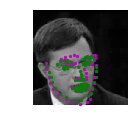

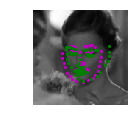

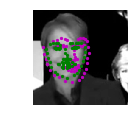

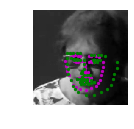

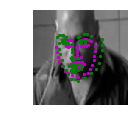

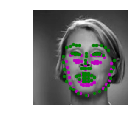

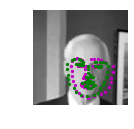

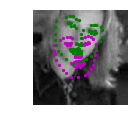

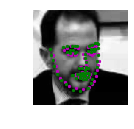

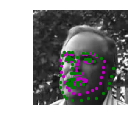

In [5]:
from torch.utils.data import DataLoader
from torchvision import transforms
from data_load import FacialKeypointsDataset,Rescale,RandomCrop,Normalize,ToTensor
data_transform = transforms.Compose([Rescale(250),RandomCrop(224),Normalize(),ToTensor()])
#得到处理后的数据集
test_dataset = FacialKeypointsDataset(csv_file='data/test_frames_keypoints.csv',root_dir='data/test/',transform=data_transform)
#测试数据加载
batch_size = 10
test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=True, num_workers=4)
#测试集测试结果
def net_sample_output():
    for i, sample in enumerate(test_loader):
        images = sample['image']
        key_pts = sample['keypoints']
        images = images.type(torch.FloatTensor)
        print(images.size())
        output_pts = net(images)
        print(output_pts.size())
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        if i == 0:
            return images, output_pts, key_pts
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """在图片上显示预测的关键点"""
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=20, marker='.', c='m')
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=20, marker='.', c='g')
# 可视化预测结果
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):
    for i in range(batch_size):
        plt.figure(figsize=(20,10))
        ax = plt.subplot(1, batch_size, i+1)
        image = test_images[i].data
        image = image.numpy()
        # image = np.transpose(image)
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy() 
        predicted_key_pts = predicted_key_pts*50.0+100
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        show_all_keypoints(np.squeeze(image,0), predicted_key_pts, ground_truth_pts)  
        plt.axis('off')
    plt.show()
test_images, test_outputs, gt_pts = net_sample_output()
visualize_output(test_images, test_outputs, gt_pts)